In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install stop_words
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.tools as tls
import plotly.offline as py
import plotly.graph_objs as go
import warnings

# NLP modules
import nltk
import re 
import string
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob , Word
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Wordcloud Modules
from wordcloud import WordCloud , STOPWORDS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=d023659e9024348bade589ecdcbf0ccfe8dd2f466b394cadf203fda70ee73baa
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [4]:
color = sns.color_palette()
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)
nltk.download("stopwords")
nltk.download("all")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]   

True

In [5]:
df=pd.read_csv('/content/drive/MyDrive/CMPE_257_Project/amazon_dataset/DatafinitiElectronicsProductData.csv')
df.head(5)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


In [6]:
df.isnull().sum()

id                        0
asins                     0
brand                     0
categories                0
colors                 2019
dateAdded                 0
dateUpdated               0
dimension              1209
ean                    4348
imageURLs                 0
keys                      0
manufacturer           2667
manufacturerNumber        0
name                      0
primaryCategories         0
reviews.date             61
reviews.dateSeen          0
reviews.doRecommend    1391
reviews.numHelpful     1486
reviews.rating          164
reviews.sourceURLs        0
reviews.text              5
reviews.title             4
reviews.username          0
sourceURLs                0
upc                       0
weight                    0
dtype: int64

In [7]:
df = df.dropna(subset=['reviews.text'])

In [8]:
df = df.dropna(subset=['reviews.rating'])

In [9]:
df.duplicated(subset=['reviews.text', 'reviews.username', 'reviews.rating', 'reviews.date']).sum()

14

In [10]:
df=df.drop_duplicates(subset=['reviews.text', 'reviews.username', 'reviews.rating', 'reviews.date'])

In [11]:
df.shape

(7116, 27)

In [12]:
df["reviews.text"] = (
    df["reviews.text"]
    .str.lower()
    .str.replace("[^\w\s]", "")
    .str.replace("\d+", "")
    .str.replace("\n", " ")
    .replace("\r", "")
    .str.replace("[^a-zA-Z0-9\s]", "")
)

In [13]:
def word_cleaner(data):
    words = [re.sub("[^a-zA-Z]", " ", i) for i in data]
    words = [i.lower() for j in words for i in j.split()] # Split all the sentences into words
    words = [i for i in words if not i in set(stopwords.words("english"))] # Split all the sentences into words
    return words

In [14]:
word_frequency = pd.DataFrame(
    nltk.FreqDist(word_cleaner(df["reviews.text"])).most_common(25),
    columns=["Frequent_Words", "Frequency"],
)

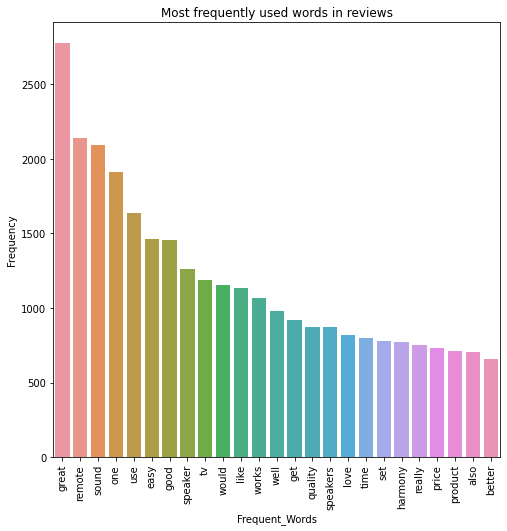

In [15]:
plt.figure(figsize=(8, 8))
plt.xticks(rotation=90)
plt.title("Most frequently used words in reviews")
sns.barplot(x="Frequent_Words", y="Frequency", data=word_frequency)

In [16]:
df['reviews_length']=df['reviews.text'].apply(len)

In [17]:
lemmatizer_output = WordNetLemmatizer()

df["reviews.text"] = df["reviews.text"].apply(
    lambda x: word_tokenize(x.lower())
)
df["reviews.text"] = df["reviews.text"].apply(
    lambda x: [word for word in x if word not in STOPWORDS]
)
df["reviews.text"] = df["reviews.text"].apply(
    lambda x: [lemmatizer_output.lemmatize(word) for word in x]
)
df["reviews.text"] = df["reviews.text"].apply(lambda x: " ".join(x))

In [18]:
df['reviews.text'].head(10)

0    keyboard easy type fingerprint reader best fea...
1                        thin light type pretty easily
2    love new design key spaced well mi type finger...
3    attached easily firmly nice feel must surface pro
4    original keyboard okay laptop feel bit floppy ...
5    purchased replace original surface pro keyboar...
6      find comfortable type rarely use fingerprint id
7    good keyboard addition surface pro platform de...
8    tough getting work surface pro worked bug love...
9    now quickly hassle free log surface finger pri...
Name: reviews.text, dtype: object

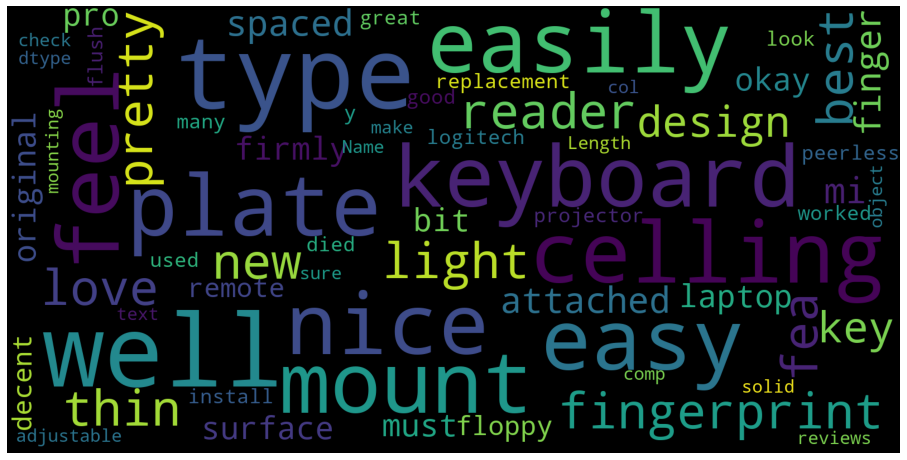

In [19]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)


def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color="black",
        stopwords=stopwords,
        max_words=250,
        max_font_size=45,
        scale=4,
        random_state=1,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 16))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize=21)
        fig.subplots_adjust(top=2.1)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(df["reviews.text"])


[Text(0.5, 1.0, 'Frequency of each rating')]

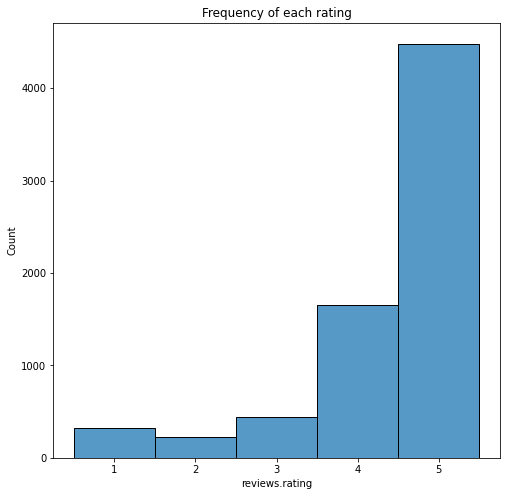

In [20]:
plt.figure(figsize=(8,8))
sns.histplot(data=df, x=df['reviews.rating'], discrete="True").set(title = "Frequency of each rating")

In [21]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [23]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

all_text=df['reviews.text']
train_text=df['reviews.text']
y=df['reviews.rating']

In [24]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)

In [25]:
train_word_features

<7116x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 133154 stored elements in Compressed Sparse Row format>

In [26]:
ros = NearMiss()

In [27]:
X_resample, y_resample = ros.fit_resample(train_word_features, y)

In [28]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({5.0: 4481, 4.0: 1657, 3.0: 438, 1.0: 318, 2.0: 222})


In [29]:
smote = SMOTE(random_state=42)
X_smote, y_smote= smote.fit_resample(train_word_features, y)

In [30]:
print('Resampled dataset shape %s' % Counter(y_resample))

Resampled dataset shape Counter({1.0: 222, 2.0: 222, 3.0: 222, 4.0: 222, 5.0: 222})


In [31]:
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({5.0: 4481, 4.0: 4481, 3.0: 4481, 2.0: 4481, 1.0: 4481})


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote,test_size=0.3,random_state=101)

In [33]:
from sklearn.metrics import accuracy_score, f1_score

In [34]:
from sklearn.model_selection import train_test_split
X_train_wf, X_test_wf, y_train_wf, y_test_wf = train_test_split(train_word_features, y,test_size=0.3,random_state=101)

In [35]:
from sklearn.model_selection import train_test_split
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_resample, y_resample,test_size=0.3,random_state=101)

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [37]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [38]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
df.loc[df['reviews.rating'] < 4, 'sentiment'] = 0
df.loc[df['reviews.rating'] >= 4, 'sentiment'] = 1

In [40]:
df['sentiment']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
7294    1.0
7295    1.0
7296    1.0
7297    1.0
7298    1.0
Name: sentiment, Length: 7116, dtype: float64

In [41]:
all_text=df['reviews.text']
train_text=df['reviews.text']
y=df['sentiment']

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std

In [43]:
ridgeReg = Ridge(alpha=1.0)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores_ri = cross_val_score(ridgeReg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores_ri = absolute(scores_ri)
print('Mean MAE: %.3f (%.3f)' % (mean(scores_ri), std(scores_ri)))


Mean MAE: 0.405 (0.010)


In [44]:
ridgeReg.fit(X_train, y_train)
reg3 = ridgeReg.predict(X_test)


In [45]:
reg3

array([1.96742659, 3.46353235, 3.03770433, ..., 3.26821369, 3.15177393,
       3.73541892])

In [46]:
ridgeReg.score(X_train, y_train)

0.892767133775277

In [47]:
ridgereg_wf = Ridge().fit(X_train_wf, y_train_wf)
ridgereg_wf.score(X_train_wf, y_train_wf)

0.679919081069428

In [48]:
ridgereg_rs = Ridge().fit(X_train_rs, y_train_rs)
ridgereg_rs.score(X_train_rs, y_train_rs)

0.7898246419338069

In [49]:
riy = ridgeReg.predict(X_test)

In [50]:
riyo = ridgereg_wf.predict(X_test_wf)

In [51]:
riyu = ridgereg_rs.predict(X_test_rs)

In [52]:
riy, riyo, riyu

(array([1.96742659, 3.46353235, 3.03770433, ..., 3.26821369, 3.15177393,
        3.73541892]),
 array([5.02643314, 4.67849989, 4.16749263, ..., 4.3550859 , 3.03563264,
        4.02690633]),
 array([2.50734611, 2.25421872, 2.10531954, 3.41848214, 3.56722051,
        3.12352438, 2.48465959, 2.70629987, 2.10843355, 3.05682773,
        2.84590284, 1.80308371, 3.23277386, 5.02984133, 3.09793692,
        3.83390301, 2.63546992, 2.60517492, 4.09617675, 2.10695671,
        3.79066369, 2.61033796, 3.68998636, 3.22555055, 4.32885165,
        3.05295203, 2.19728451, 2.997295  , 2.55901691, 2.17375046,
        2.99733205, 2.46773841, 2.20541497, 2.21784235, 2.81532697,
        3.30233533, 3.09540447, 1.62403864, 2.49345122, 2.69978387,
        2.78431504, 1.95232846, 2.97716564, 4.32637057, 3.32916261,
        2.2137479 , 3.38385192, 3.91400185, 2.99210853, 3.30617072,
        3.5411833 , 2.35076124, 3.7366641 , 3.64789638, 2.45113537,
        2.46270927, 2.76105702, 3.12764337, 3.34458204, 3.4503

In [53]:
test_ft = word_vectorizer.transform(["very disappointed with the purchase defective product"])

In [54]:
ridgeReg.predict(test_ft)

array([2.86628358])

In [55]:
test_ft = word_vectorizer.transform(["used to be bad but from when it was updated it is the best product ever"])

In [56]:
ridgeReg.predict(test_ft)

array([3.42923804])

In [57]:
ridgereg_wf.predict(test_ft)

array([3.78900897])

In [58]:
ridgereg_rs.predict(test_ft)

array([2.37709163])

In [ ]:
# SVM

In [59]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear', random_state = 3)

In [60]:
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=3)

In [61]:
clf.fit(X_train_wf, y_train_wf)

SVC(kernel='linear', random_state=3)

In [62]:
clf.fit(X_train_rs, y_train_rs)

SVC(kernel='linear', random_state=3)

In [63]:
svpred = clf.predict(X_test)

In [64]:
svpred_wf = clf.predict(X_test_wf)

In [65]:
svpred_rs = clf.predict(X_test_rs)

In [66]:
svpred, svpred_wf, svpred_rs

(array([2., 5., 3., ..., 3., 2., 2.]),
 array([3., 1., 3., ..., 3., 2., 5.]),
 array([1., 3., 1., 2., 2., 4., 3., 3., 1., 5., 2., 2., 3., 5., 5., 5., 1.,
        3., 5., 1., 4., 1., 4., 3., 4., 4., 1., 3., 2., 2., 3., 2., 1., 2.,
        1., 4., 2., 1., 3., 3., 3., 2., 2., 5., 5., 2., 2., 4., 4., 3., 4.,
        2., 3., 5., 2., 1., 2., 5., 2., 3., 5., 5., 4., 4., 2., 5., 3., 1.,
        2., 3., 2., 4., 2., 3., 3., 5., 2., 3., 4., 5., 1., 2., 3., 1., 2.,
        1., 3., 5., 5., 4., 1., 4., 5., 1., 4., 3., 1., 5., 3., 2., 4., 3.,
        2., 4., 2., 5., 3., 2., 3., 5., 2., 3., 4., 1., 3., 3., 2., 3., 4.,
        1., 2., 3., 3., 5., 3., 4., 3., 2., 1., 2., 3., 3., 2., 1., 1., 1.,
        5., 2., 1., 4., 1., 2., 2., 5., 4., 2., 2., 3., 3., 5., 2., 3., 5.,
        4., 2., 2., 2., 1., 1., 2., 5., 4., 3., 4., 5., 5., 1., 2., 1., 3.,
        4., 3., 3., 2., 2., 2., 5., 5., 5., 1., 5., 3., 2., 5., 5., 4., 5.,
        5., 2., 5., 2., 3., 2., 1., 2., 4., 5., 4., 5., 5., 4., 3., 2., 5.,
        2.

In [67]:
f1_score(y_test, svpred, average='micro')

0.5532579589407914

In [68]:
f1_score(y_test_wf, svpred_wf, average='micro')

0.326463700234192

In [69]:
f1_score(y_test_rs, svpred_rs, average='micro')

0.3963963963963964

In [70]:
f1_score(y_test, svpred, average='macro')

0.5341849918816106